In [0]:
# To download files
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1IIZQyDW6gyw1_yigC4whlqLeuEr6_b-d'})
downloaded.GetContentFile('train_clean.csv')

downloaded = drive.CreateFile({'id':'1sOh376Y8hs0KKevZ7CArKmFEIty0FWAO'})
downloaded.GetContentFile('test_clean.csv')

downloaded = drive.CreateFile({'id':'1yP-mQHvkkncFAV_Mxyyna05ZyC0GzPKe'})
downloaded.GetContentFile('sample_submission.csv')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
# load data
training_data = pd.read_csv('train_clean.csv')
testing_data = pd.read_csv('test_clean.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [0]:
y_train = training_data['loss'].ravel()
# remove target variable from feature
x_train = np.array(training_data.drop('loss', 1))
x_test = np.array(testing_data)

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, BatchNormalization
from keras.objectives import MSE, MAE
from keras.callbacks import EarlyStopping
import keras

In [0]:
model = Sequential()

model.add(Dense(input_dim=x_train.shape[1], units=256))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=32, kernel_initializer=keras.initializers.glorot_normal(seed=1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(units=1))
model.compile("nadam", "mae")

In [15]:
# patience: represents the number of epochs before stopping once the loss stop improving.
early_stopping = EarlyStopping(monitor='val_loss', patience=100)
train_log = model.fit(x_train, y_train, batch_size=256, epochs=200, validation_split=0.1, verbose=2, callbacks=[early_stopping])

Train on 169486 samples, validate on 18832 samples
Epoch 1/200
 - 11s - loss: 2985.6920 - val_loss: 2857.6045
Epoch 2/200
 - 10s - loss: 2687.8364 - val_loss: 2416.8473
Epoch 3/200
 - 10s - loss: 2216.1399 - val_loss: 1829.3529
Epoch 4/200
 - 10s - loss: 1715.4507 - val_loss: 1638.9424
Epoch 5/200
 - 9s - loss: 1390.8284 - val_loss: 1300.8622
Epoch 6/200
 - 10s - loss: 1259.3867 - val_loss: 1322.3249
Epoch 7/200
 - 10s - loss: 1226.2642 - val_loss: 1575.8000
Epoch 8/200
 - 10s - loss: 1219.3419 - val_loss: 1261.5786
Epoch 9/200
 - 10s - loss: 1214.7353 - val_loss: 1288.1579
Epoch 10/200
 - 10s - loss: 1208.6432 - val_loss: 1254.7002
Epoch 11/200
 - 10s - loss: 1209.4228 - val_loss: 1211.5185
Epoch 12/200
 - 10s - loss: 1206.4220 - val_loss: 1296.9355
Epoch 13/200
 - 10s - loss: 1202.2816 - val_loss: 1232.8153
Epoch 14/200
 - 10s - loss: 1199.9256 - val_loss: 1194.4298
Epoch 15/200
 - 10s - loss: 1198.4394 - val_loss: 1350.4415
Epoch 16/200
 - 10s - loss: 1197.9815 - val_loss: 1249.6945

Epoch 41/200
 - 9s - loss: 1172.2113 - val_loss: 1330.7961
Epoch 42/200
 - 10s - loss: 1170.5767 - val_loss: 1184.9469
Epoch 43/200
 - 10s - loss: 1170.3416 - val_loss: 1236.6232
Epoch 44/200
 - 10s - loss: 1169.7720 - val_loss: 1241.3952
Epoch 45/200
 - 10s - loss: 1169.3374 - val_loss: 1199.4731
Epoch 46/200
 - 10s - loss: 1168.9012 - val_loss: 1204.8392
Epoch 47/200
 - 10s - loss: 1168.1775 - val_loss: 1189.0764
Epoch 48/200
 - 10s - loss: 1167.0449 - val_loss: 1209.5092
Epoch 49/200
 - 10s - loss: 1168.4344 - val_loss: 1216.3947
Epoch 50/200
 - 10s - loss: 1166.8235 - val_loss: 1194.2174
Epoch 51/200
 - 10s - loss: 1165.4609 - val_loss: 1180.3087
Epoch 52/200
 - 10s - loss: 1165.5978 - val_loss: 1182.9318
Epoch 53/200
 - 10s - loss: 1164.1716 - val_loss: 1203.5777
Epoch 54/200
 - 10s - loss: 1164.2430 - val_loss: 1302.5949
Epoch 55/200
 - 10s - loss: 1163.7817 - val_loss: 1198.1328
Epoch 56/200
 - 9s - loss: 1163.4836 - val_loss: 1191.6598
Epoch 57/200
 - 10s - loss: 1163.6032 - va

 - 10s - loss: 1152.8531 - val_loss: 1211.1471
Epoch 82/200
 - 10s - loss: 1153.1777 - val_loss: 1187.7361
Epoch 83/200
 - 10s - loss: 1152.8892 - val_loss: 1197.3429
Epoch 84/200
 - 10s - loss: 1152.7743 - val_loss: 1194.3178
Epoch 85/200
 - 10s - loss: 1152.4972 - val_loss: 1246.8106
Epoch 86/200
 - 10s - loss: 1152.2300 - val_loss: 1206.3382
Epoch 87/200
 - 10s - loss: 1151.2287 - val_loss: 1194.1127
Epoch 88/200
 - 10s - loss: 1151.5734 - val_loss: 1207.1229
Epoch 89/200
 - 10s - loss: 1149.8870 - val_loss: 1184.8591
Epoch 90/200
 - 10s - loss: 1150.9390 - val_loss: 1199.5874
Epoch 91/200
 - 10s - loss: 1149.4829 - val_loss: 1182.3154
Epoch 92/200
 - 10s - loss: 1149.4130 - val_loss: 1184.1467
Epoch 93/200
 - 10s - loss: 1149.3860 - val_loss: 1193.3213
Epoch 94/200
 - 9s - loss: 1149.0907 - val_loss: 1225.0108
Epoch 95/200
 - 9s - loss: 1148.8452 - val_loss: 1191.8456
Epoch 96/200
 - 9s - loss: 1148.6362 - val_loss: 1204.1166
Epoch 97/200
 - 9s - loss: 1148.3173 - val_loss: 1203.77

 - 7s - loss: 1142.5681 - val_loss: 1198.6711
Epoch 122/200
 - 7s - loss: 1141.2924 - val_loss: 1270.3393
Epoch 123/200
 - 7s - loss: 1141.2666 - val_loss: 1200.7899
Epoch 124/200
 - 7s - loss: 1141.6508 - val_loss: 1189.5449
Epoch 125/200
 - 7s - loss: 1140.8021 - val_loss: 1225.0589
Epoch 126/200
 - 7s - loss: 1141.3407 - val_loss: 1231.1561
Epoch 127/200
 - 7s - loss: 1141.2487 - val_loss: 1186.4099
Epoch 128/200
 - 7s - loss: 1140.8094 - val_loss: 1205.4397
Epoch 129/200
 - 7s - loss: 1140.6111 - val_loss: 1184.7303
Epoch 130/200
 - 7s - loss: 1139.5945 - val_loss: 1190.8497
Epoch 131/200
 - 7s - loss: 1138.9916 - val_loss: 1179.3391
Epoch 132/200
 - 7s - loss: 1138.8406 - val_loss: 1195.6657
Epoch 133/200
 - 6s - loss: 1140.1309 - val_loss: 1186.9966
Epoch 134/200
 - 7s - loss: 1139.1536 - val_loss: 1186.9934
Epoch 135/200
 - 6s - loss: 1139.9101 - val_loss: 1204.2142
Epoch 136/200
 - 8s - loss: 1137.7565 - val_loss: 1204.4735
Epoch 137/200
 - 8s - loss: 1138.0837 - val_loss: 1272

 - 6s - loss: 1134.6306 - val_loss: 1202.9775
Epoch 162/200
 - 7s - loss: 1132.7317 - val_loss: 1198.4001
Epoch 163/200
 - 6s - loss: 1134.5425 - val_loss: 1191.6502
Epoch 164/200
 - 6s - loss: 1133.7109 - val_loss: 1222.8367
Epoch 165/200
 - 8s - loss: 1133.7249 - val_loss: 1187.8989
Epoch 166/200
 - 8s - loss: 1133.9407 - val_loss: 1193.4571
Epoch 167/200
 - 7s - loss: 1132.8075 - val_loss: 1182.4153
Epoch 168/200
 - 7s - loss: 1133.7965 - val_loss: 1198.3213
Epoch 169/200
 - 6s - loss: 1133.3519 - val_loss: 1211.3739
Epoch 170/200
 - 7s - loss: 1131.4009 - val_loss: 1199.5181
Epoch 171/200
 - 7s - loss: 1132.0740 - val_loss: 1213.8095
Epoch 172/200
 - 7s - loss: 1132.3938 - val_loss: 1200.7779
Epoch 173/200
 - 7s - loss: 1133.5032 - val_loss: 1193.3360
Epoch 174/200
 - 7s - loss: 1131.3389 - val_loss: 1197.2500
Epoch 175/200
 - 6s - loss: 1131.8595 - val_loss: 1215.7009
Epoch 176/200
 - 7s - loss: 1131.3986 - val_loss: 1193.5812
Epoch 177/200
 - 7s - loss: 1132.0235 - val_loss: 1189

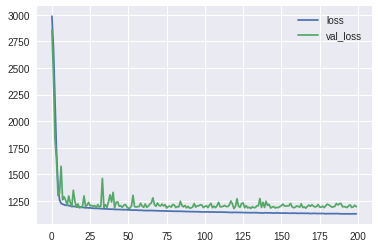

In [16]:
plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()

In [0]:
pred_y = model.predict(x_test)
final_result = pd.DataFrame()
final_result['id'] = sample_submission['id']
final_result['loss'] = pred_y

In [0]:
from google.colab import files
final_result.to_csv('submission10.csv', index=False)
files.download('submission10.csv')

In [0]:
# store results of predictions for training example for stacking
res = model.predict(x_train)
final_result = pd.DataFrame()
final_result['id'] = range(len(x_train))
final_result['model4'] = res
final_result.to_csv('model4.csv', index=False)

In [40]:
model.evaluate(x_train, y_train)

188318/188318 [==============================] - 9s 47us/step


1158.769161510187

In [0]:
from google.colab import files
final_result.to_csv('model4.csv', index=False)
files.download('model4.csv')

Score: 1188.66248<br>
Position: 2125 / 3055 (69.56%)